<a href="https://colab.research.google.com/github/sheikhi-a/Big-data-with-Python/blob/main/spark_preprocessing_missing_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# preprocessing and exloring data using Spark


By Ayyub Sheikhi, SBUK  (sheikhy.a@uk.ac.ir)

In [ ]:

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq



In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"



In [ ]:

from pyspark.sql import SparkSession


spark = SparkSession.builder \
    .master("local[1]") \
    .appName("SparkByExamples.com") \
    .getOrCreate()


print(spark)
spark


In [ ]:
spark

In [ ]:
#SparkContext is created by default with the variable name sc
sc = spark.sparkContext
sc

In [ ]:
from pyspark import SparkContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

#print (pyspark.__version__)

In [ ]:
#running spark default settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

%matplotlib inline

In [ ]:
# Data Frame spark profiling
from pyspark.sql.types import IntegerType, StringType, DoubleType, ShortType, DecimalType
import pyspark.sql.functions as func
from pyspark.sql.functions import isnull
from pyspark.sql.functions import isnan, when, count, col, round
from pyspark.sql.functions import mean
from pyspark.sql.types import Row
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf


# Pandas DF operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

# Modeling + Evaluation
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.sql.functions import avg
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

Copy the mall customers data set to the content
[link text](https://github.com/elsyifa/Clustering-Pyspark/blob/master/Mall_Customers.csv)

In [ ]:
#Initializing File Type
file_type = 'text'
path=r'Mall_Customers.csv'
delimeter=','
def load_data(file_type):
    """input type of file "text" or "parquet" and Return pyspark dataframe"""
    if file_type =="text": # use text as file type input
        df = spark.read.option("header", "true") \
        .option("delimeter",delimeter)\
        .option("inferSchema", "true") \
        .csv(path)
    else:
        df= spark.read.parquet("example.parquet") #path file that you want import
    return df
df = load_data(file_type)
help(load_data)

load_data(file_type)


Help on function load_data in module __main__:

load_data(file_type)
    input type of file "text" or "parquet" and Return pyspark dataframe



DataFrame[CustomerID: int, Genre: string, Age: int, Annual Income (k$): int, Spending Score (1-100): int]

In [ ]:
#another way to read the but we dont run it
df0=spark.read.csv('Mall_Customers.csv', header=True)


In [ ]:
type(df)
pyspark.sql.dataframe.DataFrame
#show 5 observation in DataFrame
df.show(3)

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
+----------+------+---+------------------+----------------------+
only showing top 3 rows



# Preprocessing

1-name of variables

In [ ]:
df.printSchema()

df=df.withColumnRenamed('CustomerID','Id')
df=df.withColumnRenamed('Annual Income (k$)','AnnIncome')
df=df.withColumnRenamed('Spending Score (1-100)','SpendScore')

len(df.columns), df.columns


root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



(5, ['Id', 'Gender', 'Age', 'AnnIncome', 'SpendScore'])

In [ ]:



df.dtypes

num_cols=['Age', 'AnnIncome', 'SpendScore']
df.select(num_cols).describe().show()
mann_age=df.select('Age').describe().collect()[1],[1]



+-------+-----------------+-----------------+------------------+
|summary|              Age|        AnnIncome|        SpendScore|
+-------+-----------------+-----------------+------------------+
|  count|              200|              196|               195|
|   mean|            38.85|60.73979591836735| 50.43589743589744|
| stddev|13.96900733155888|26.33197623168131|25.565758018924654|
|    min|               18|               15|                 1|
|    max|               70|              137|                99|
+-------+-----------------+-----------------+------------------+




3- Missing values detection

In [ ]:
df_pd=df.toPandas()
mis_val = df_pd.isnull().sum()
mis_valA = df_pd.AnnIncome.isnull().sum()

df_Nomiss=df.na.drop()
df_Nomiss.count()


df_Nomiss.groupBy('Gender').count()

df_Nomiss.groupBy('Gender').count().sort(col("count").desc()).show()

mode=df_Nomiss.groupBy('Gender').count().sort(col("count").desc()).collect()[0][0]
df.show()
df = df.na.fill({'Gender':mode})

df.describe().show()
df.select(mean('AnnIncome')).show()
meanvalue = df.select(mean('AnnIncome')).collect()[0][0]
df = df.na.fill({'AnnIncome':meanvalue})

meanvalue = df.select(mean('SpendScore')).collect()[0][0]
df = df.na.fill({'SpendScore':meanvalue})


+------+-----+
|Gender|count|
+------+-----+
|Female|  103|
|  Male|   84|
+------+-----+

+---+------+---+---------+----------+
| Id|Gender|Age|AnnIncome|SpendScore|
+---+------+---+---------+----------+
|  1|  Male| 19|       15|        39|
|  2|  Male| 21|       15|        81|
|  3|Female| 20|       16|         6|
|  4|Female| 23|       16|        77|
|  5|Female| 31|       17|        40|
|  6|  NULL| 22|       17|        76|
|  7|Female| 35|       18|         6|
|  8|  NULL| 23|     NULL|        94|
|  9|  Male| 64|       19|      NULL|
| 10|  NULL| 30|       19|        72|
| 11|  Male| 67|       19|        14|
| 12|Female| 35|       19|        99|
| 13|Female| 58|       20|      NULL|
| 14|  NULL| 24|       20|        77|
| 15|  Male| 37|       20|        13|
| 16|  Male| 22|       20|      NULL|
| 17|Female| 35|       21|        35|
| 18|  Male| 20|       21|        66|
| 19|  Male| 52|       23|        29|
| 20|Female| 35|       23|        98|
+---+------+---+---------+---------

Graphical representation for another preprocessing

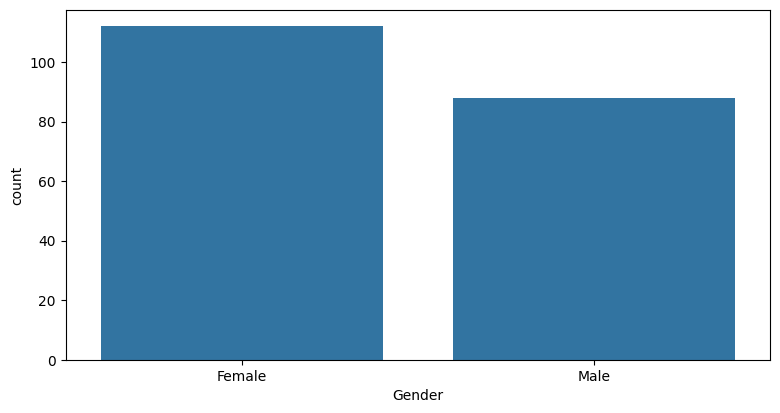

In [ ]:
import seaborn as sns

df_pd2=df.toPandas()

plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='Gender', data=df_pd2, order=df_pd['Gender'].value_counts().index)
plt.show()

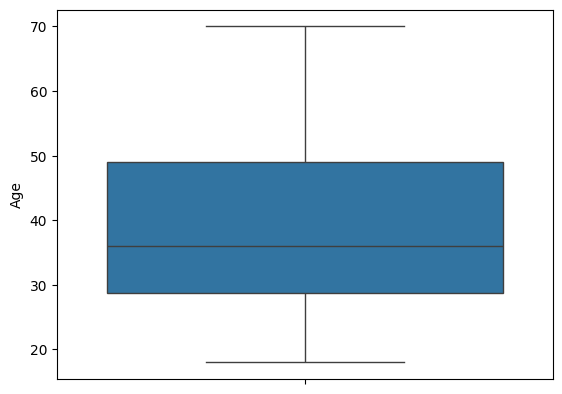

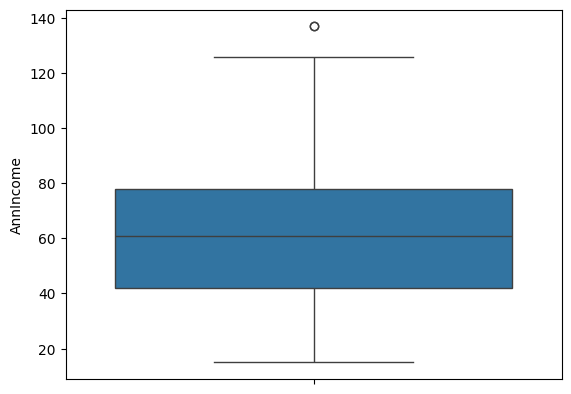

In [ ]:
#Checking outliers

sns.boxplot(y="Age",data=df_pd2)
plt.show()


sns.boxplot(y="AnnIncome",data=df_pd2)
plt.show()



# Handle of outlier


Q1 = the value that cut off 25% of the first data when it is sorted in ascending order.

Q2 =  median

Q3 = the value that cut off 75% of the first data when it is sorted in ascending order.

IQR or interquartile range is range between Q1 and Q3. IQR = Q3 - Q1.

Upper side = Q3 + 1.5 * IQR

Lower side = Q1 - 1.5 * IQR

Outliers  are equivalent  to the observation that our grather thab the upper side or less than the lower side

In [ ]:
from pyspark.sql.functions import col, expr, percentile_approx


percentiles = df.select(
    percentile_approx("AnnIncome", 0.25).alias("Q1"),
    percentile_approx("AnnIncome", 0.75).alias("Q3")
).collect()

Q1 = percentiles[0]["Q1"]
Q3 = percentiles[0]["Q3"]
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df.filter((col("AnnIncome") < lower_bound) | (col("AnnIncome") > upper_bound))

outliers.show()
df_no_out= df.filter((col("AnnIncome") >lower_bound) & (col("AnnIncome") < upper_bound))
df_no_out.count()




df_no_out.describe().show()


+---+------+---+---------+----------+
| Id|Gender|Age|AnnIncome|SpendScore|
+---+------+---+---------+----------+
|199|  Male| 32|      137|        18|
|200|  Male| 30|      137|        83|
+---+------+---+---------+----------+

+-------+------------------+------+------------------+-----------------+-----------------+
|summary|                Id|Gender|               Age|        AnnIncome|       SpendScore|
+-------+------------------+------+------------------+-----------------+-----------------+
|  count|               198|   198|               198|              198|              198|
|   mean|              99.5|  NULL| 38.92929292929293|59.95454545454545|50.42424242424242|
| stddev|57.301832431432764|  NULL|14.016851732555248|25.03364141678589|25.15821647140652|
|    min|                 1|Female|                18|               15|                1|
|    max|               198|  Male|                70|              126|               99|
+-------+------------------+------+--------

In [ ]:
sc.stop()